In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [2]:
# вспомогательные константы
DICT_YES_NO = {'yes': 1, 'no': 0}


# вспомогательные функции


# получение данных о выбросах с помощью формулы интерквартильного расстояния
def get_outliers(col):
    outliers = {}
    outliers['median'] = col.median()
    outliers['perc25'] = col.quantile(0.25)
    outliers['perc75'] = col.quantile(0.75)
    outliers['iqr'] = outliers['perc75'] - outliers['perc25']
    outliers['limit_min'] = outliers['perc25'] - 1.5 * outliers['iqr']
    outliers['limit_max'] = outliers['perc75'] + 1.5 * outliers['iqr']
    return outliers


# вывод данных о выбросах в человеческом виде
def print_outliers(outliers):
    print('25-й перцентиль: {},'.format(outliers['perc25']),
          '75-й перцентиль: {},'.format(outliers['perc75']),
          "IQR: {}, ".format(outliers['iqr']),
          "Границы выбросов: [{f}, {l}].".format(f=outliers['limit_min'],
                                                 l=outliers['limit_max']))


# заменяет значения используя dict (для перевода колонок из номинативной в числовую)
def transform_by_dict(x, dict_values):
    dict_values.setdefault(np.nan)
    return dict_values.get(x)


# выводит boxplot для колонки
def get_boxplot(dt, x_column, y_column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=x_column, y=y_column, data=dt.loc[dt.loc[:, x_column].isin(
        dt.loc[:, x_column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + x_column)
    plt.show()


# Проверка статистической разница в распределении по номинативным признакам, с помощью теста Стьюдента
def get_stat_dif(dt, x_column, y_column):
    cols = dt.loc[:, x_column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dt.loc[dt.loc[:, x_column] == comb[0], y_column],
                     dt.loc[dt.loc[:, x_column] == comb[1], y_column]).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', x_column)
            break

In [3]:
# приступаем к аналитике

display(stud_math.head(10))
stud_math.info()

# мы видим, что в датасете 13 числовых и 17 строковых столбцов

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# приведем названия колонок к единому стилю (snake case), для удобства оперирования над ними

stud_math.columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job',
    'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health', 'absences', 'score'
]


In [5]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   p_status            350 non-null    object 
 6   m_edu               392 non-null    float64
 7   f_edu               371 non-null    float64
 8   m_job               376 non-null    object 
 9   f_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [6]:
# обойдем все столбцы вручную по очереди

In [7]:
# Аббревиатура школы

stud_math.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

In [8]:
# номинативный признак, который содержит два значения - MS и GP. Пустых значений нет

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

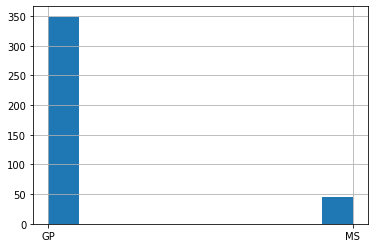

In [9]:
stud_math.school.hist()
stud_math.school.describe()

In [10]:
# довольно "чистый" стоблец, с которым дополнительных действий совершать не нужно

In [11]:
# Пол ('F' - женский, 'M' - мужской)

stud_math.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

In [12]:
# номинативный признак, содержит два значения - F и M. Пустых значений нет

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

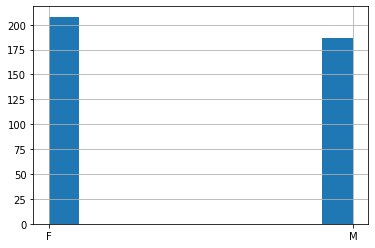

In [13]:
stud_math.sex.hist()
stud_math.sex.describe()

In [14]:
# Возраст

stud_math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [15]:
# содержит значения от 15 до 22. Пропусков нет

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

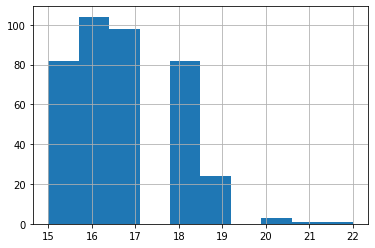

In [16]:
# это целочисленный стоблец, который расмотрим подробнее
stud_math.age.hist()
stud_math.age.describe()

In [17]:
# основная масса учеников от 15 и до 19
# Не зная конкретики датасета, меня бы смутили данные 20-22.
# Если проверить их на выбросы, то 22 действительно выходит за границы
outliers = print_outliers(get_outliers(stud_math.age))
# Однако, согласно условиям, возраст учеников находится в диапазоне от 15 до 22, так что пропускаем

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [18]:
# Тип адреса ученика ('U' - городской, 'R' - за городом)

stud_math.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

In [19]:
# здесь мы встречаем пустые значения nan
# согласно документации pandas, "NaN is the default missing value marker"
# внутренние функции pa корректно работают с этим значением
# поскольку заменить осмысленным значением мы его не можем, нет нужды его обрабатывать сейчас

In [20]:
# данная колнка согласно спецификации принимает два значения - "городской" и "за городом".
# то есть мы можем трансформировать колонку в логическую,
# которая отвечает на вопрос "живет в городе" - да/нет

# !!! недостаток опыта в pandas !!!
# для меня было логичным использовать значения True/False, но я столкнулся с тем,
# что с колонкой с такими значениям работать наоборот сложнее, 
# а pandas в добавок постоянно выдает предупреждения, 
# что переводит в функциях ее в тип int8. 
# Возможно я делал что-то не так, но я не стал бороться с мельницей 
# и вместо bool стал использовать int где True=1, False=0.

stud_math.address = stud_math.address.apply(
    transform_by_dict, dict_values={'U': 1, 'R': 0})
stud_math.address.value_counts(dropna=False)

1.0    295
0.0     83
NaN     17
Name: address, dtype: int64

count    378.000000
mean       0.780423
std        0.414509
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: address, dtype: float64

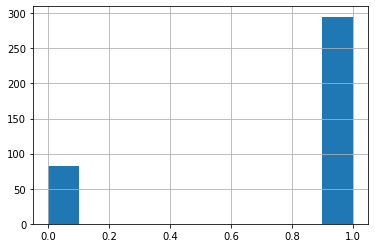

In [21]:
# посмотрим наглядно, сколько учеников проживают в городе, а сколько за городом
stud_math.address.hist()
stud_math.address.describe()

In [22]:
# городских значительно больше. 
# В дальнейшем будет интересно проанализировать, влияют ли эти значения на что-либо

In [23]:
# Размер семьи ('LE3' <= 3, 'GT3' >3)

stud_math.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

In [24]:
# снова есть пустые значения "nan". Пропускаем, по той же причине, что и раньше

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

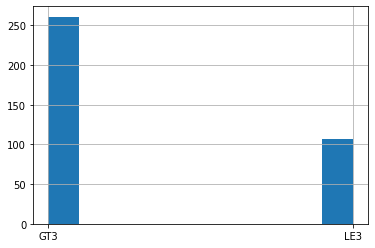

In [25]:
# выведем наглядно состав семьи
stud_math.famsize.hist()
stud_math.famsize.describe()

In [26]:
# большинство живет в небольших семьях

In [27]:
# статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

stud_math.p_status.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: p_status, dtype: int64

In [28]:
# снова есть пустые значения "nan", причем довольно много - больше 10% датасета. 
# Оставляем как есть, поскольку заполнить их не можем

count     350
unique      2
top         T
freq      314
Name: p_status, dtype: object

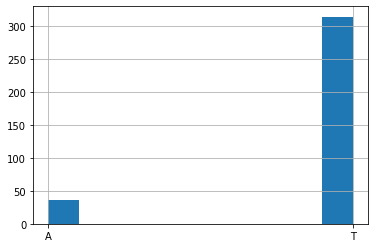

In [29]:
# выведем наглядно статус совместного жилья родителей
stud_math.p_status.hist()
stud_math.p_status.describe()

In [30]:
# также можно конвертировать в логическое значение 
# с формулировкой "живут ли родители вместе"
stud_math.p_status = stud_math.p_status.apply(
    transform_by_dict, dict_values={'T': 1, 'A': 0})

In [31]:
# большинство живут в полных семьях

In [32]:
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
# 3 - среднее специальное или 11 классов, 4 - высшее)
stud_math.m_edu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: m_edu, dtype: int64

In [33]:
# снова есть пустые значения "nan", но всего два. Заполнить не можем, пропускаем

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

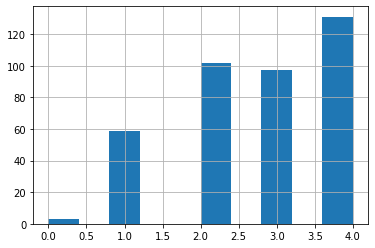

In [34]:
stud_math.m_edu.hist()
stud_math.m_edu.describe()

In [35]:
#  образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
# 3 - среднее специальное или 11 классов, 4 - высшее)
stud_math.f_edu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: f_edu, dtype: int64

In [36]:
# много пустых значений

In [37]:
# мы видим явно лишнее значение 40,
# возможно это опечатка в "4", но в этом уверенности нет, так что заменим пустым значением
stud_math.f_edu = stud_math.f_edu.apply(lambda x: np.nan if x == 40 else x)

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

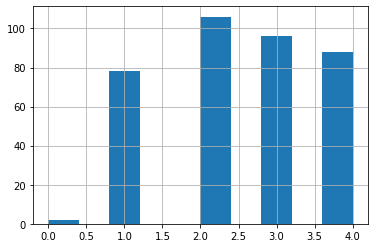

In [38]:
stud_math.f_edu.hist()
stud_math.f_edu.describe()

In [39]:
# работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
stud_math.m_job.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: m_job, dtype: int64

count       376
unique        5
top       other
freq        133
Name: m_job, dtype: object

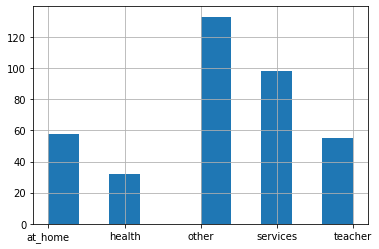

In [40]:
stud_math.m_job.hist()
stud_math.m_job.describe()

In [41]:
# работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
stud_math.f_job.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

In [ ]:
# много пропусков. Около 10% от датасета

count       359
unique        5
top       other
freq        197
Name: f_job, dtype: object

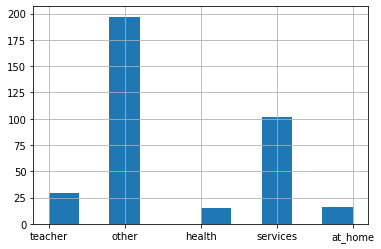

In [42]:
stud_math.f_job.hist()
stud_math.f_job.describe()

In [43]:
# причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# 'course' - образовательная программа, 'other' - другое)
stud_math.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

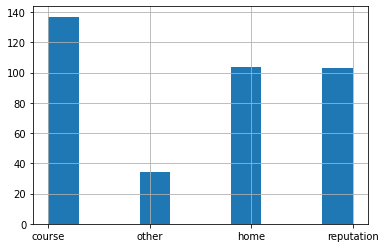

In [44]:
stud_math.reason.hist()
stud_math.reason.describe()

In [45]:
# опекун ('mother' - мать, 'father' - отец, 'other' - другое)
stud_math.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

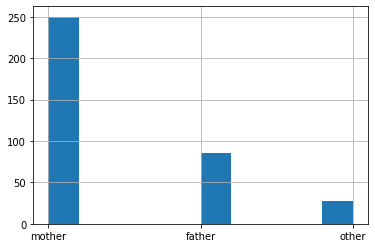

In [46]:
stud_math.guardian.hist()
stud_math.guardian.describe()

In [47]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
stud_math.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

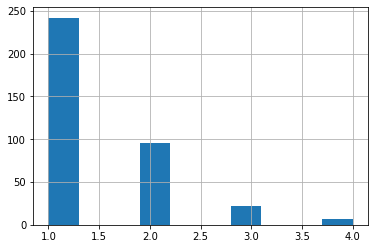

In [48]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

In [49]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 
# 3 - 5-10 часов, 4 - >10 часов)

stud_math.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

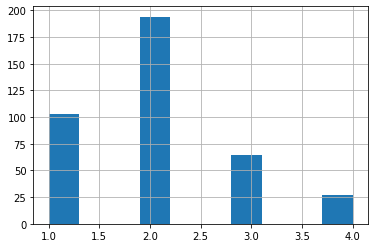

In [50]:
stud_math.studytime.hist()
stud_math.studytime.describe()

In [51]:
# кроме studytime у нас есть поле "studytime_granular", которое не описано в задании.
# попробуем понять, как связаны эти два поля
stud_math['studytime'].corr(stud_math['studytime_granular'])

-1.0

In [52]:
# корреляция между двумя полями равна минус единице
# то есть значения напрямую связаны между собой.

# попробуем сопоставить значения
print(stud_math.studytime.value_counts())
print(stud_math.studytime_granular.value_counts())

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64


In [53]:
# наглядно видно, что значения просто умножены на -3
# я не могу понять, зачем это сделано. Может быть это связано со значениями 
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

# также, как я заметил позже, одно дополнительное инвертированное поле делает heatmap сбалансированнее
# за счет появившихся очень синих -1 в таблице. Но вряд ли это объясняет цель существования колонки

In [54]:
# нам нет необходимости хранить оба этих поля
stud_math.drop(['studytime_granular'], inplace=True, axis=1)

In [55]:
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

stud_math.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

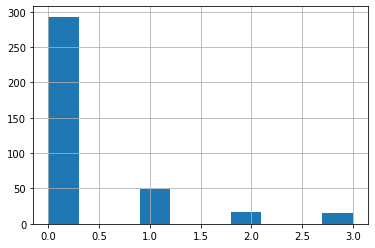

In [56]:
# числовое поле, выбросов нет

stud_math.failures.hist()
stud_math.failures.describe()

In [57]:
# дополнительная образовательная поддержка (yes или no)

stud_math.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [58]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.schoolsup = stud_math.schoolsup.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

In [59]:
stud_math.schoolsup.value_counts(dropna=False)

0.0    335
1.0     51
NaN      9
Name: schoolsup, dtype: int64

In [60]:
#stud_math.schoolsup.hist()
#stud_math.schoolsup.describe()

In [61]:
# семейная образовательная поддержка (yes или no)

stud_math.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

In [ ]:
# много пропусков, больше 10%

In [62]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.famsup = stud_math.famsup.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    356.000000
mean       0.615169
std        0.487240
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: famsup, dtype: float64

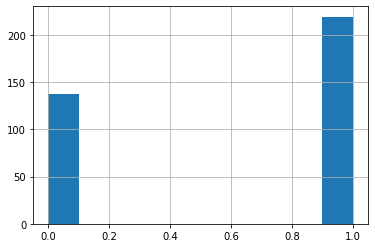

In [63]:
stud_math.famsup.hist()
stud_math.famsup.describe()

In [64]:
# дополнительные платные занятия по математике (yes или no)

stud_math.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

In [ ]:
# много пропусков. Больше 10%

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

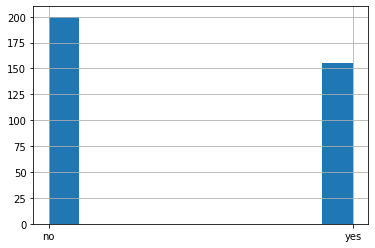

In [65]:
stud_math.paid.hist()
stud_math.paid.describe()

In [66]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.paid = stud_math.paid.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

In [67]:
# дополнительные внеучебные занятия (yes или no)

stud_math.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

In [68]:
stud_math.activities = stud_math.activities.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    381.000000
mean       0.511811
std        0.500518
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64

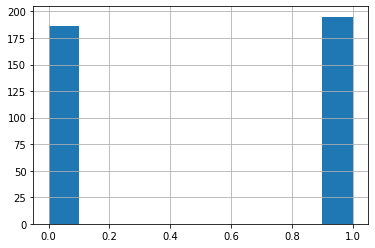

In [69]:
stud_math.activities.hist()
stud_math.activities.describe()

In [70]:
# посещал детский сад (yes или no)

stud_math.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

In [71]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.nursery = stud_math.nursery.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    379.000000
mean       0.791557
std        0.406732
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nursery, dtype: float64

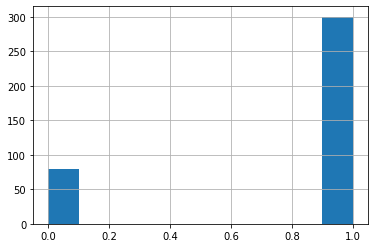

In [72]:
stud_math.nursery.hist()
stud_math.nursery.describe()

In [73]:
# хочет получить высшее образование (yes или no)

stud_math.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

In [74]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.higher = stud_math.higher.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    375.000000
mean       0.949333
std        0.219609
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: higher, dtype: float64

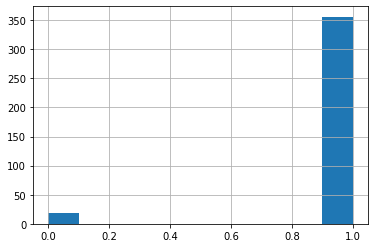

In [75]:
stud_math.higher.hist()
stud_math.higher.describe()

In [76]:
# наличие интернета дома (yes или no)

stud_math.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

In [77]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.internet = stud_math.internet.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    361.000000
mean       0.844875
std        0.362526
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64

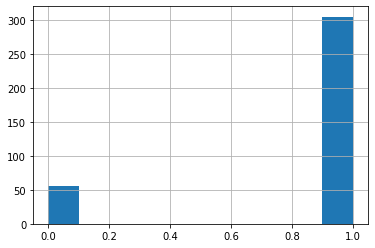

In [78]:
stud_math.internet.hist()
stud_math.internet.describe()

In [79]:
# в романтических отношениях (yes или no)

stud_math.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

In [80]:
# поскольку значения в этом поле принимают yes/no, 
# то его стоит перевести в логическое

stud_math.romantic = stud_math.romantic.apply(
    transform_by_dict, dict_values=DICT_YES_NO)

count    364.000000
mean       0.340659
std        0.474583
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64

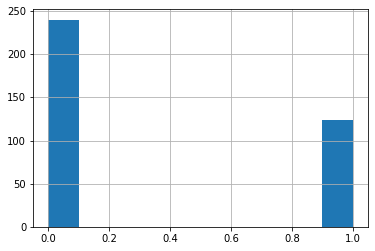

In [81]:
stud_math.romantic.hist()
stud_math.romantic.describe()

In [82]:
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

stud_math.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [83]:
# -1 - это явно лишнее значение, которое нужно удалить
stud_math.famrel = stud_math.famrel.apply(lambda x: np.nan if x == -1 else x)

count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

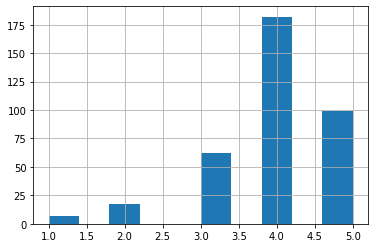

In [84]:
stud_math.famrel.hist()
stud_math.famrel.describe()

In [85]:
# свободное время после школы (от 1 - очень мало до 5 - очень много)

stud_math.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

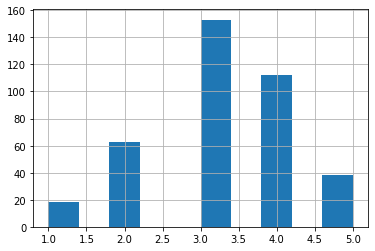

In [86]:
stud_math.freetime.hist()
stud_math.freetime.describe()

In [87]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

stud_math.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

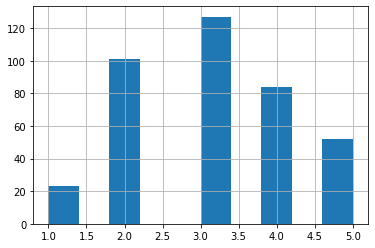

In [88]:
stud_math.goout.hist()
stud_math.goout.describe()

In [89]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

stud_math.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

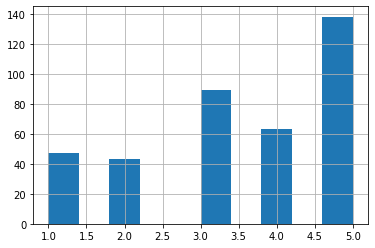

In [90]:
stud_math.health.hist()
stud_math.health.describe()

In [91]:
# количество пропущенных занятий

stud_math.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

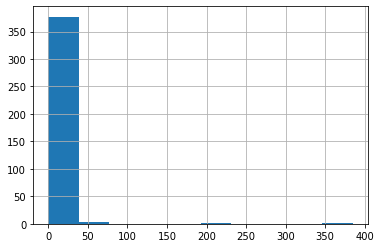

In [92]:
stud_math.absences.hist()
stud_math.absences.describe()

In [93]:
# здесь мы видим подозрительно большие числа.

# К сожалению, у нас недостаточно информации для точной фильтрации этих данных
# нам не известно как много занятий было проведено
# В таком случае, если ученик пропустил большинство, например, по болезни,
# то данные значения вполне могут быть настоящими
# однако попробуем руководствоваться здравым смыслом, и посчитаем, что 212 и 385 - это выбросы

stud_math.absences = stud_math.absences.apply(
    lambda x: np.nan if x > 200 else x)

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

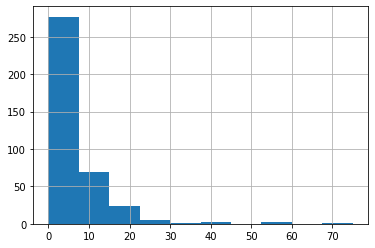

In [94]:
stud_math.absences.hist()
stud_math.absences.describe()

In [95]:
# баллы по госэкзамену по математике

stud_math.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

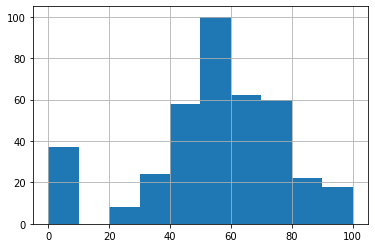

In [96]:
stud_math.score.hist()
stud_math.score.describe()

In [97]:
# данные довольно странные. Множество учеников получили 0 баллов за тест.
# можем проверить на выбросы по формуле, но вряд ли это что-то даст
print_outliers(get_outliers(stud_math.score))
# конечно, ничего не дало

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [98]:
# может быть ученики, которые получили 0 баллов просто присутствовали на нем?
# в таком случае, эти значения нам будут мешать и их нужно отсюда удалить
# можно выделить их в отдельную колонку "присутствовал ли ученик на занятиях"
# но для этого данные стоит выделить в отдельный датасет, который исследуем позже
skipped_exam = stud_math

In [99]:
# сейчас перед нами стоит задача узнать, что именно влияет на оценку
# потому отфильтровываем все оценки, что равны нулю, либо nan
stud_math = stud_math[~stud_math.score.isna() & (stud_math.score > 0)]

In [100]:
# данный столбец содержит пропуски. Этот стоблец для нас целевой - мы анализируем,
# что именно влияет на его значение. Соотвественно, пропуски нам здесь не нужны. Удаляем
stud_math = stud_math.dropna(subset=['score'])

In [101]:
# поскольку нас интересует не максимально конкретное числовое предсказание (93 или 94 балла)
# а категориальное (хорошо сдаст или плохо), то количество значений стоит уменьшить
# можно было бы просто перевести все в привычную пятибалльную систему,
# но с ней не все так просто, так как нельзя просто поделить 
# на равные части, потому что 80-90 баллов - это не "отлично". 
# То есть так или иначе нужно найти правильную таблицу перевода из стобалльной системы
# 
# Я нашел семибалльную ects - европейская система облегченной шкалы оценивания

# 1-34 = F (неудовлетворительно, с обязательным повторным курсом)
# 35-59 = FX (неудовлетворительно, с возможностью пересдачи)
# 60-66 = E (достаточно)
# 67-74 = D (удовлетворительно)
# 75-81 = C (хорошо)
# 82-89 = B (очень хорошо)
# 90-100 = A (отлично)

# однако она буквенная, что помешает дальнейшему использованию
# потому я дополнительно переведу буквы в числа от 1 до 7




In [102]:
def make_ects(x):
    if x <= 34:
        return 1  # 'F'
    elif x <= 59:
        return 2  # 'FX'
    elif x <= 66:
        return 3  # 'E'
    elif x <= 74:
        return 4  # 'D'
    elif x <= 81:
        return 5  # 'C'
    elif x <= 89:
        return 6  # 'B'
    else:
        return 7  # 'A'


stud_math['score_ects'] = stud_math.score.apply(make_ects)
stud_math.drop('score', inplace=True, axis=1)

# для вспомогательных функций меняем целевую колонку
score_column = 'score_ects'

count    352.000000
mean       3.005682
std        1.532170
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: score_ects, dtype: float64

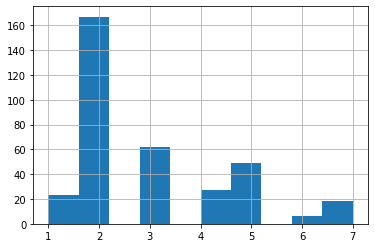

In [103]:
stud_math.score_ects.hist()
stud_math.score_ects.describe()

In [104]:
# в целом, глядя на полученные оценки, можно сказать, что успеваемость низкая
# так как очень много учеников получило оценку "неудовлетворительно"

<AxesSubplot:>

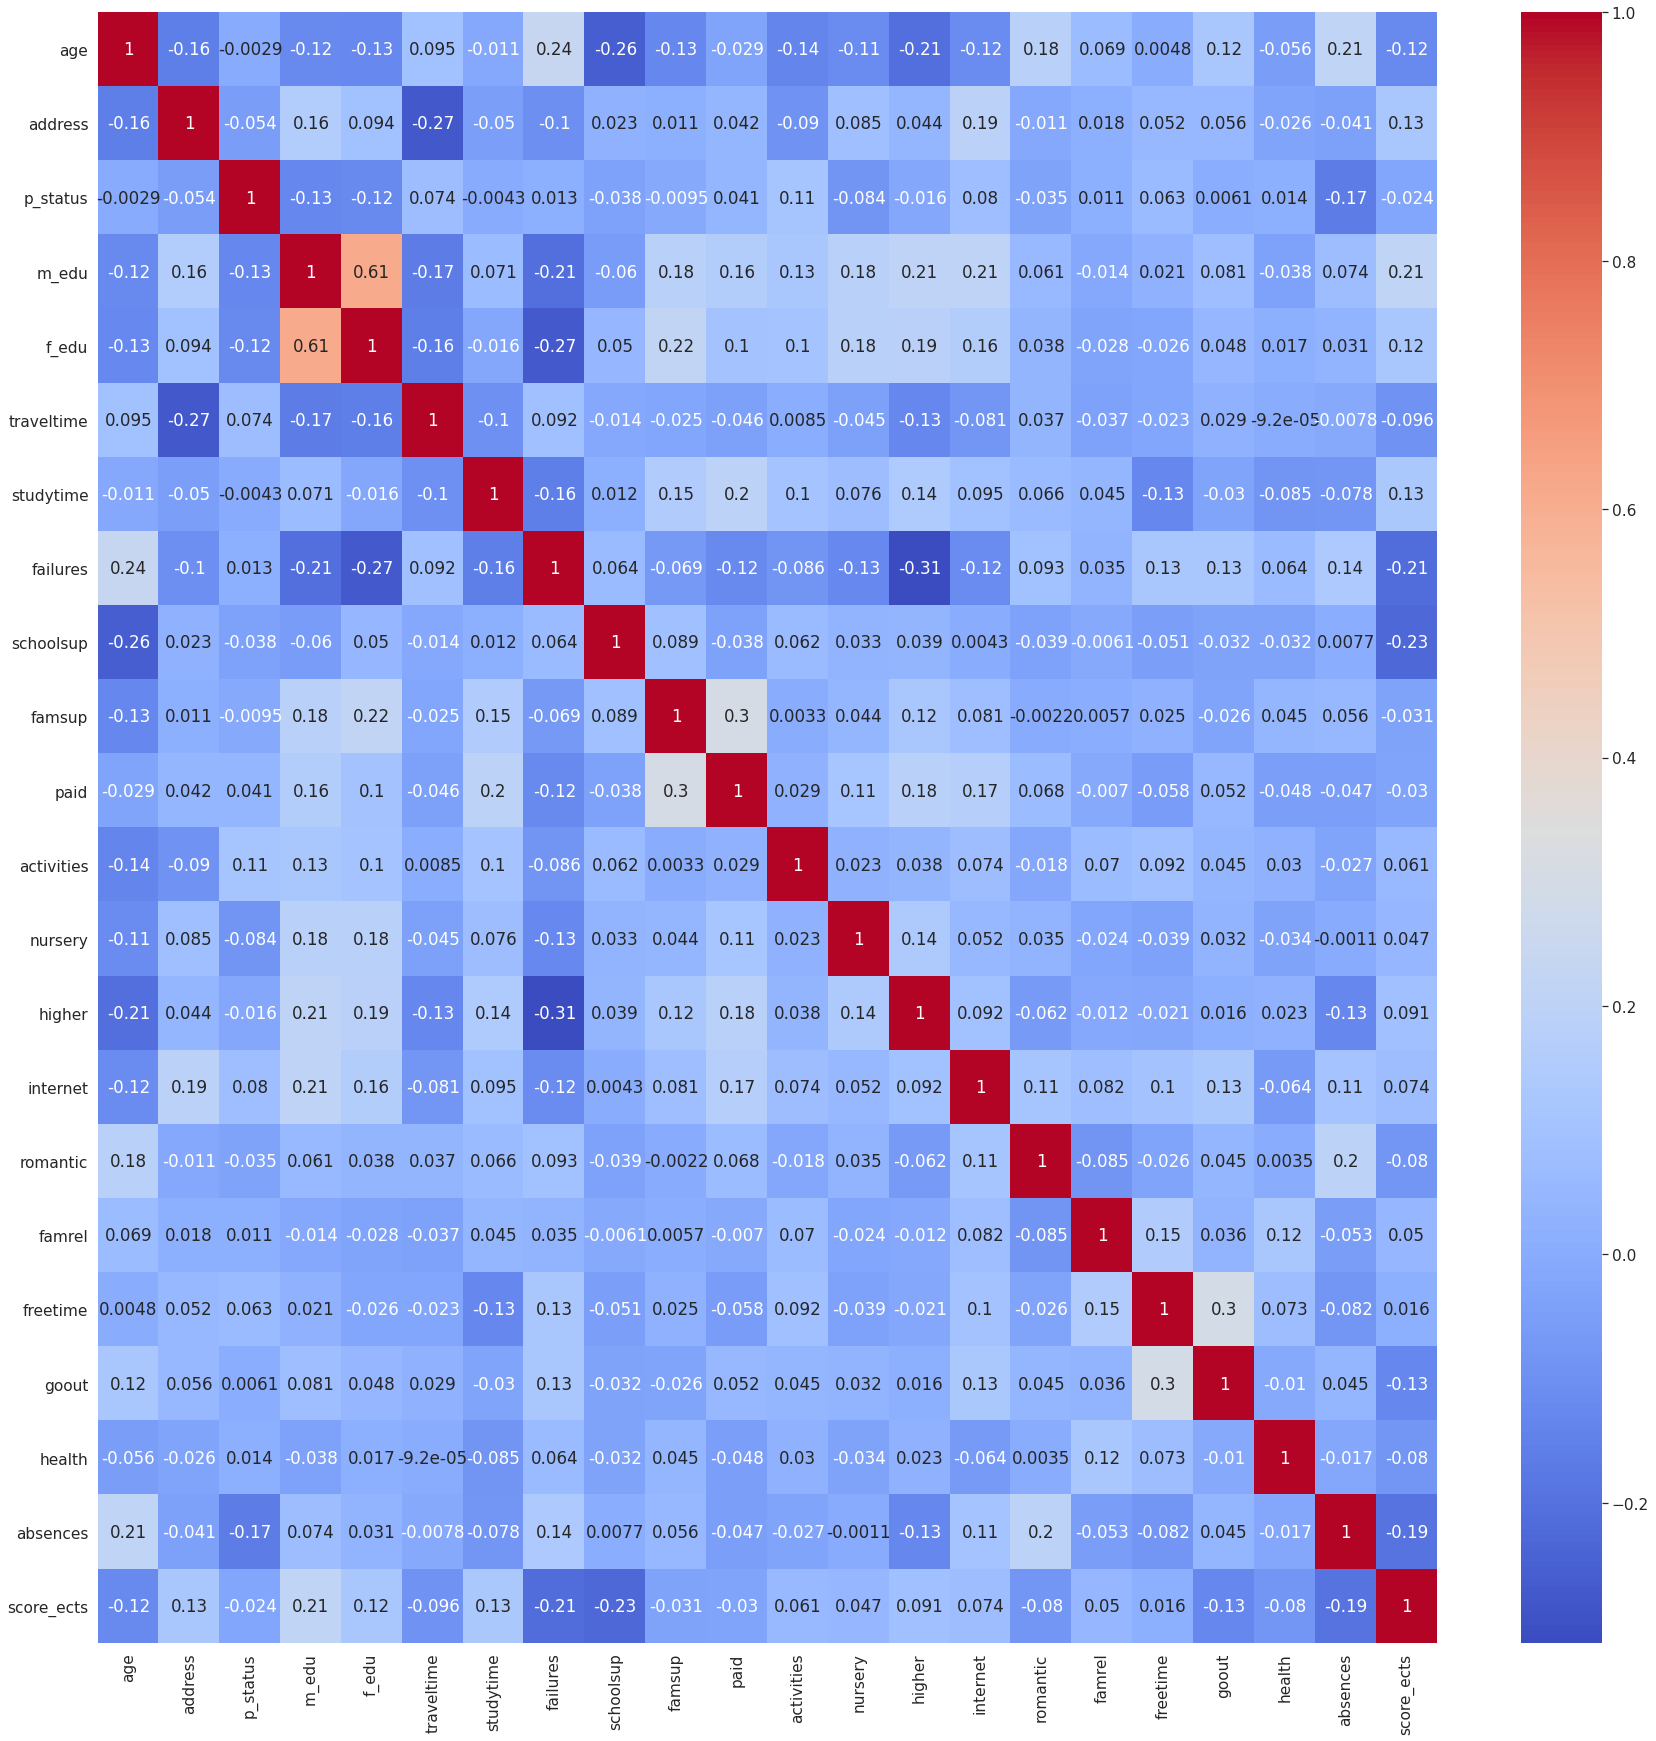

In [105]:
# поскольку таблица получается большая, для лучшего восприятия воспользуюсь seaborn heatmap
correlation = stud_math.corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.4)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [106]:
# сравнивая корреляции, видно высокие между образованием отца и матери (0.6)
# а с ними в свою очередь коррелируют, хотя и не так сильно, famsup, paid, activities, 
# nursery, higher, internet, а также score. 
# И отрицательно коррелирует failures, traveltime, p_status и age 

# можно предположить, что семейные пары складываются примерно из одних кругов
# а семьи с высоким образованием родителей стремятся дать хорошее образование детям

# семейная образовательная поддержка коррелируется с доп.платными занятиями (0.3)

# обратная корреляция между желающими получить высшее образование 
# и количеством внеучебных неудач (0.31)

# романтические отношения имеют слабую корреляцию с возрастом (0.18) 
# и могут сказываться на количестве пропущенных занятий (0.2)
# что может сказываться на успеваемости (слабая обратная корреляция между пропущенными занятиями и итоговым баллом -0.192 )

In [107]:
# наша цель - это анализ успеваемости, потому подробнее рассмотрим корреляцию с оценками:

print(correlation[['score_ects']].sort_values(
    'score_ects', ascending=False).head(10))

# и отрицательные
print(correlation[['score_ects']].sort_values(
    'score_ects', ascending=True).head(10))

            score_ects
score_ects    1.000000
m_edu         0.210749
studytime     0.132733
address       0.127270
f_edu         0.123356
higher        0.091037
internet      0.073530
activities    0.060660
famrel        0.049935
nursery       0.046947
            score_ects
schoolsup    -0.230015
failures     -0.211340
absences     -0.192004
goout        -0.130439
age          -0.118831
traveltime   -0.095791
health       -0.080145
romantic     -0.079627
famsup       -0.031373
paid         -0.029518


In [108]:
# наиболее сильно коррелирует оценка:
# с образованием матери
# временем на учебу помимо школы
# адресом (живет ли ученик в городе)
# образованием отца
# и стремлением получить высшее образование


# отрицательно корелирует с:
# дополнительной образовательной поддержкой
# количеством внеучебных неудач
# пропусками занятий
# проведением времени с друзьями
# возрастом

# я отберу колонки с корреляцией выше 0.1 по модулю
dest_columns = [
    'm_edu', 'studytime', 'address', 'f_edu',
    'schoolsup', 'failures', 'absences', 'goout', 'age'
]

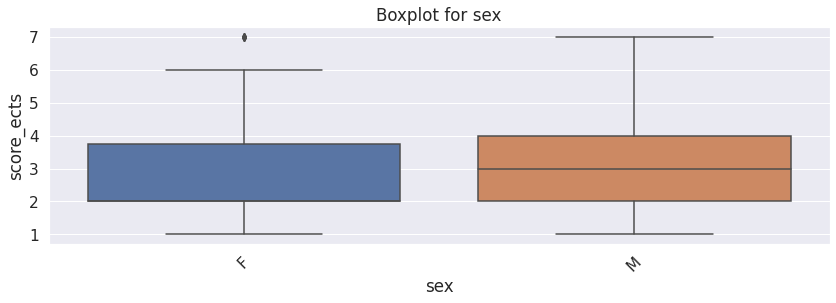

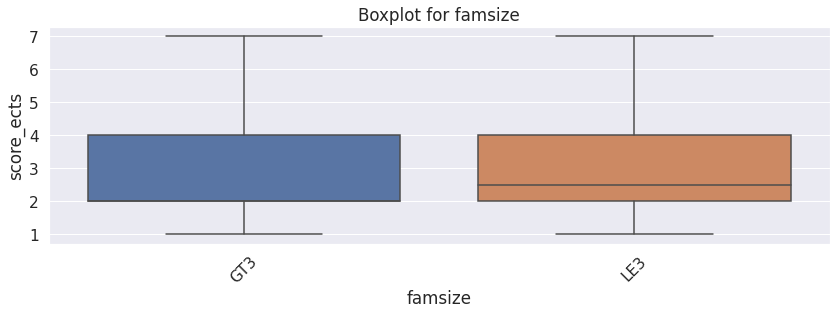

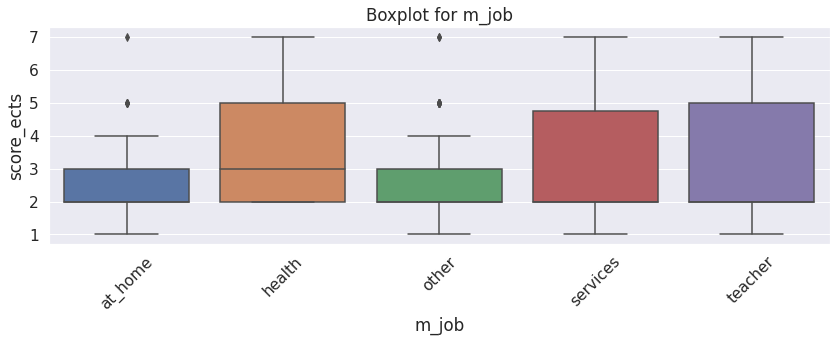

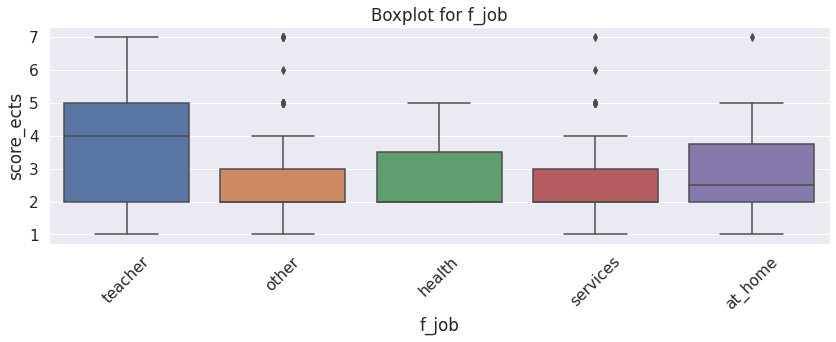

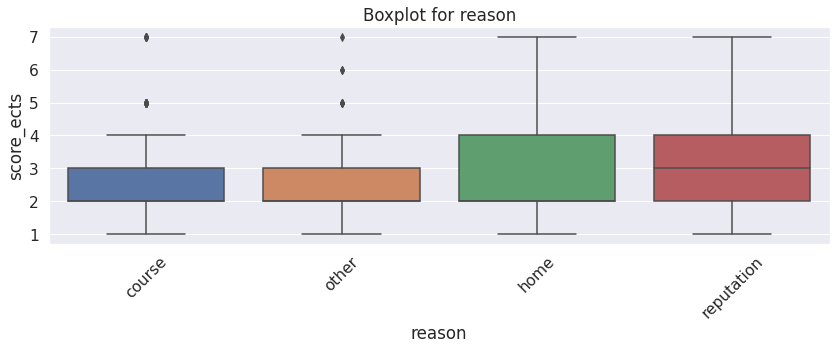

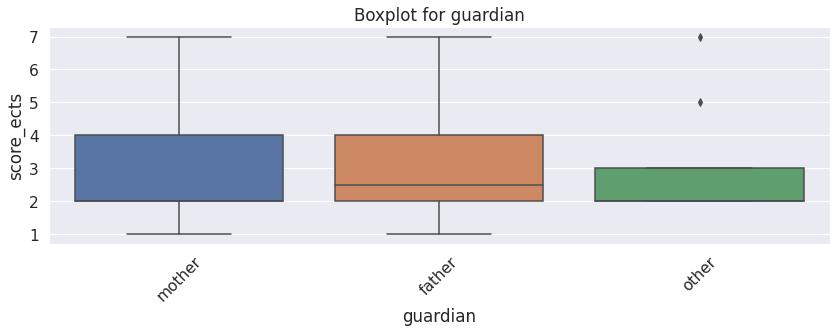

In [109]:
for col in ['sex', 'famsize', 'm_job', 'f_job', 'reason', 'guardian']:
    get_boxplot(stud_math, col, 'score_ects')

In [110]:
for col in ['sex', 'famsize', 'm_job', 'f_job', 'reason', 'guardian']:
    get_stat_dif(stud_math, col, 'score_ects')

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job


In [111]:
# добавим эти колонки в список имеющих корреляцию
dest_columns.extend(['sex', 'm_job', 'f_job'])

In [112]:
# дополнительно попробуем определить, что влияет на пропуск экзамена

# для начала очистим его от na значений
skipped_exam = skipped_exam.dropna(subset=['score'])

# и создадим логическую колонку, где skipped_exam=1
skipped_exam['skipped_exam'] = skipped_exam.score.apply(
    lambda x: 1 if x == 0 else 0)

# удалим ненужную уже нам score
skipped_exam.drop('score', inplace=True, axis=1)

In [113]:
skipped_exam_cor = skipped_exam.corr()

# сейчас меня интересует корреляция только с колонкой skipped_exam, потому я не буду
# выводить визуальные графики, просто выведу максимальные корреляции
print(skipped_exam_cor[['skipped_exam']].sort_values(
    'skipped_exam', ascending=False).head(6))

print(skipped_exam_cor[['skipped_exam']].sort_values(
    'skipped_exam', ascending=True).head(5))

              skipped_exam
skipped_exam      1.000000
failures          0.236297
romantic          0.138133
age               0.097603
p_status          0.046871
activities        0.038146
           skipped_exam
absences      -0.231177
higher        -0.171359
paid          -0.152928
m_edu         -0.127218
schoolsup     -0.099882


In [114]:
# мы видим, что пропуск экзамена положительно коррелирован с:
# failures - это количество внеучебных неудач
# romantic - находится ли ученик в романтических отношениях

# и отрицательно с:
# absences - количеством пропущенных занятий. 
# Получается, что ученики имеющие тенденцию пропускать занятия, на экзамен приходили?
# higher - те, кто стремятся получить высшее образования, экзамен пропускали реже
# paid - те, кто брал платные доп.занятия
# m_edu - образование матери

In [115]:
# ответ

stud_math_for_model = stud_math.loc[:, dest_columns]
stud_math_for_model.head()




,m_edu,studytime,address,f_edu,schoolsup,failures,absences,goout,age,sex,m_job,f_job
0,4.0,2.0,1.0,4.0,1.0,0.0,6.0,4.0,18,F,at_home,teacher
1,1.0,2.0,1.0,1.0,0.0,0.0,4.0,3.0,17,F,at_home,other
2,1.0,2.0,1.0,1.0,1.0,3.0,10.0,2.0,15,F,at_home,other
3,4.0,3.0,1.0,2.0,0.0,0.0,2.0,2.0,15,F,health,NaN
4,3.0,2.0,1.0,3.0,0.0,0.0,4.0,2.0,16,F,other,other


In [117]:
# выводы

# было выделено 12 признаков с наивысшей положительной и отрицательной корреляцией
# большинство номинативных признаков можно было перевести в логические

# датасет довольно чистый, полей с выбросами мало, количество самих выбросов единичное
# пропуски встречаются, но не сильно влияют на анализ. Максимальное количество ~ 10%

# корреляции с оценками были найдены, но их много и они низкие. 
# Максимальная по модулю - 0.23
# Возможно, что предсказать оценку на основе этих данных будет непросто

# По субъективным впечатлениям, на оценку оказывает влияние в первую очередь семья:
# в тех, в которых родители имеют высокое образование, 
# дети имеют более высокую корреляцию с признаками, которые коррелируют с итоговой оценкой
